In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
n_cpu = os.cpu_count()
n_thread = n_cpu*2

In [3]:
df = pd.read_csv('Breast_Cancer.csv')

In [4]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [6]:
df.describe()


,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [7]:
df['T Stage '].value_counts()


T Stage 
T2    1786
T1    1603
T3     533
T4     102
Name: count, dtype: int64

In [8]:
df['N Stage'].value_counts()


N Stage
N1    2732
N2     820
N3     472
Name: count, dtype: int64

In [9]:
df['6th Stage'].value_counts()


6th Stage
IIA     1305
IIB     1130
IIIA    1050
IIIC     472
IIIB      67
Name: count, dtype: int64

In [10]:
df['differentiate'].value_counts()

differentiate
Moderately differentiated    2351
Poorly differentiated        1111
Well differentiated           543
Undifferentiated               19
Name: count, dtype: int64

In [11]:
df['Status'].value_counts()


Status
Alive    3408
Dead      616
Name: count, dtype: int64

In [12]:
df.drop(['Survival Months'], axis=1, inplace=True)


In [13]:
df.describe()


,Age,Tumor Size,Regional Node Examined,Reginol Node Positive
count,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052
std,8.963134,21.119696,8.099675,5.109331
min,30.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000
50%,54.000000,25.000000,14.000000,2.000000
75%,61.000000,38.000000,19.000000,5.000000
max,69.000000,140.000000,61.000000,46.000000


<Axes: xlabel='Age', ylabel='Count'>

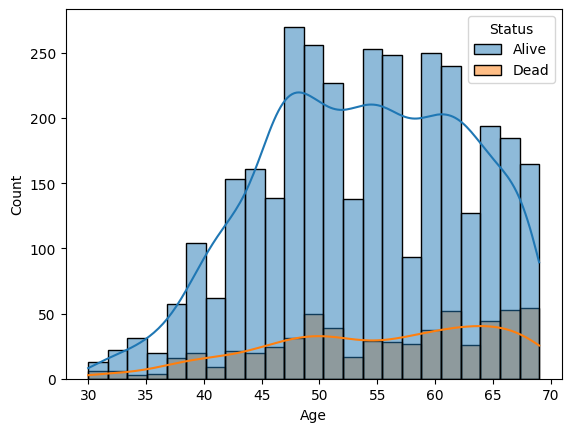

In [15]:
sns.histplot(data=df, x='Age', hue='Status', kde=True)


<Axes: xlabel='Status', ylabel='Age'>

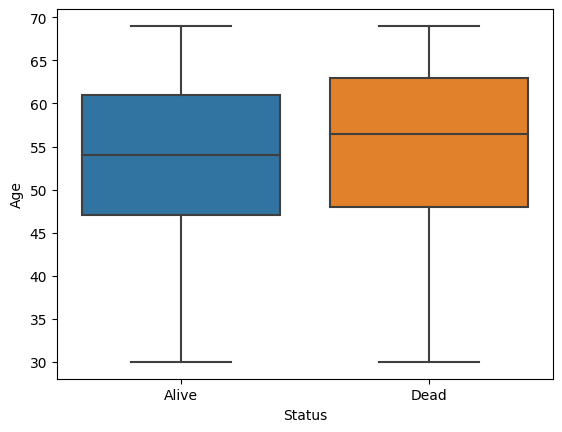

In [16]:
sns.boxplot(data=df, x='Status', y='Age')


<Axes: xlabel='Tumor Size', ylabel='Count'>

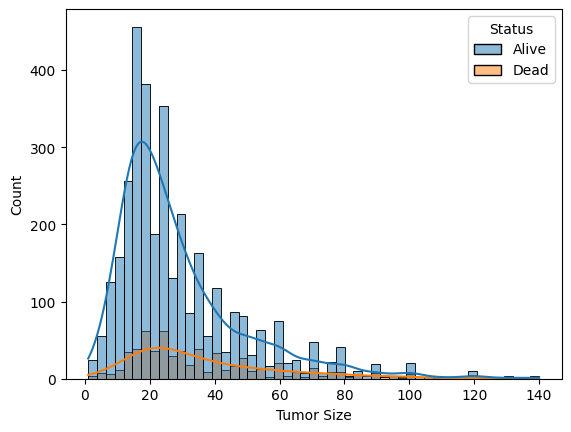

In [17]:
sns.histplot(data=df, x='Tumor Size', hue='Status', kde=True)


<Axes: xlabel='Status', ylabel='Tumor Size'>

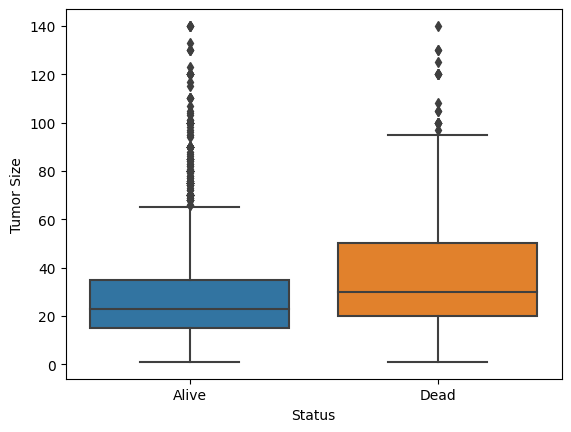

In [18]:
sns.boxplot(data=df, x='Status', y='Tumor Size')


<Axes: xlabel='Regional Node Examined', ylabel='Count'>

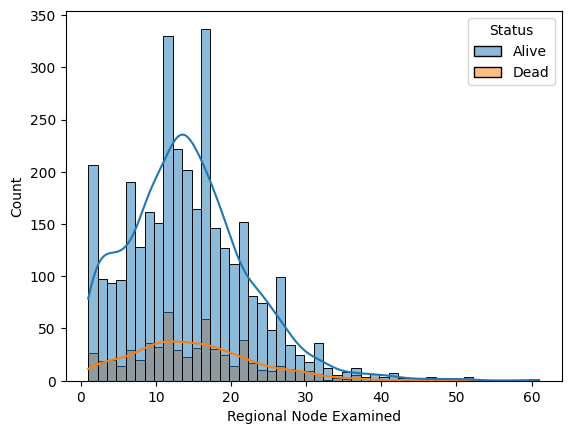

In [19]:
sns.histplot(data=df, x='Regional Node Examined', hue='Status', kde=True)


<Axes: xlabel='Status', ylabel='Regional Node Examined'>

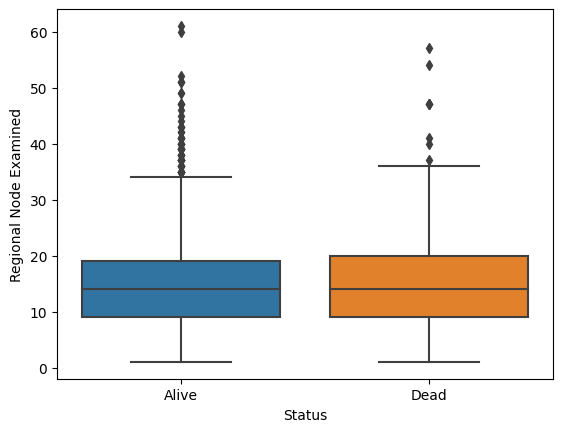

In [20]:
sns.boxplot(data=df, x='Status', y='Regional Node Examined')


<Axes: xlabel='Reginol Node Positive', ylabel='Count'>

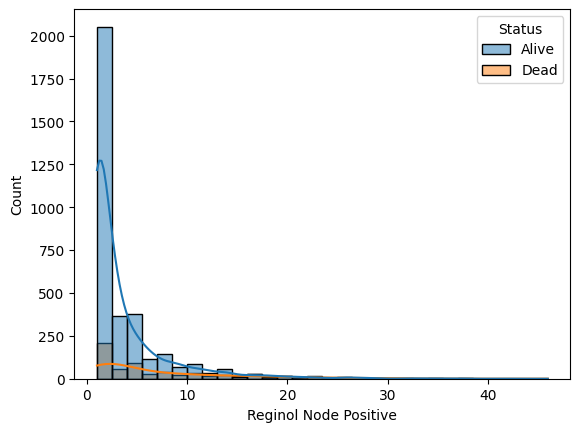

In [21]:
sns.histplot(data=df, x='Reginol Node Positive', hue='Status', kde=True, bins=30)


<Axes: xlabel='Status', ylabel='Reginol Node Positive'>

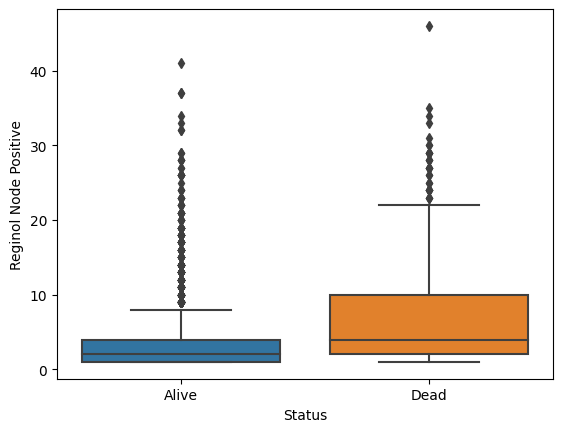

In [22]:
sns.boxplot(data=df, x='Status', y='Reginol Node Positive')


In [23]:
df.columns


Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Status'],
      dtype='object')

<Axes: xlabel='Race', ylabel='count'>

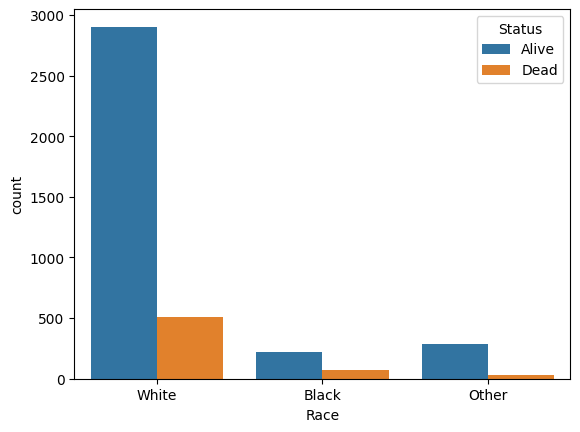

In [24]:
sns.countplot(data=df, x='Race', hue='Status')


<Axes: xlabel='Marital Status', ylabel='count'>

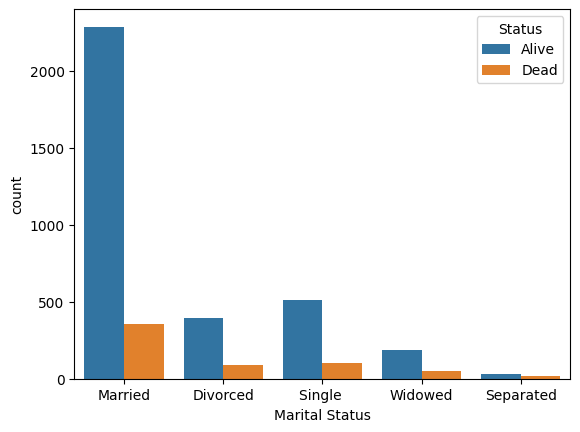

In [25]:
sns.countplot(data=df, x='Marital Status', hue='Status')


<Axes: xlabel='N Stage', ylabel='count'>

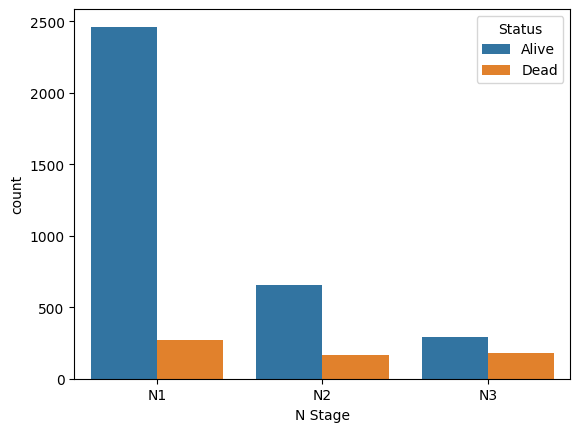

In [26]:
sns.countplot(data=df, x='N Stage', hue='Status')


<Axes: xlabel='T Stage ', ylabel='count'>

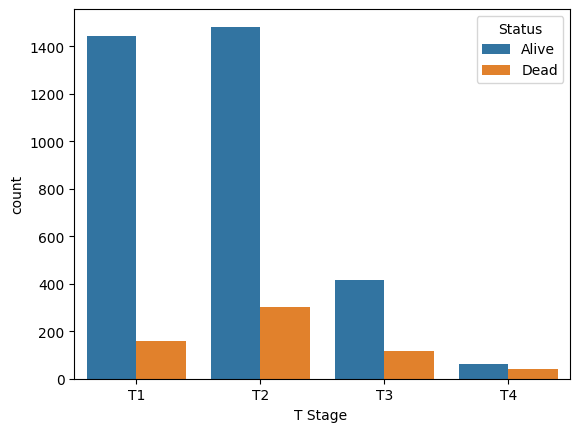

In [27]:
sns.countplot(data=df, x='T Stage ', hue='Status')


<Axes: xlabel='6th Stage', ylabel='count'>

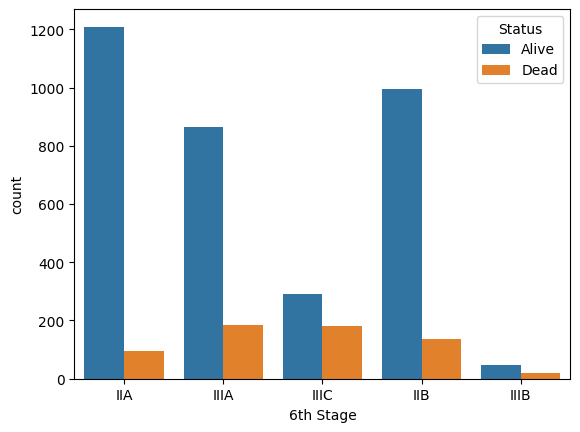

In [28]:
sns.countplot(data=df, x='6th Stage', hue='Status')


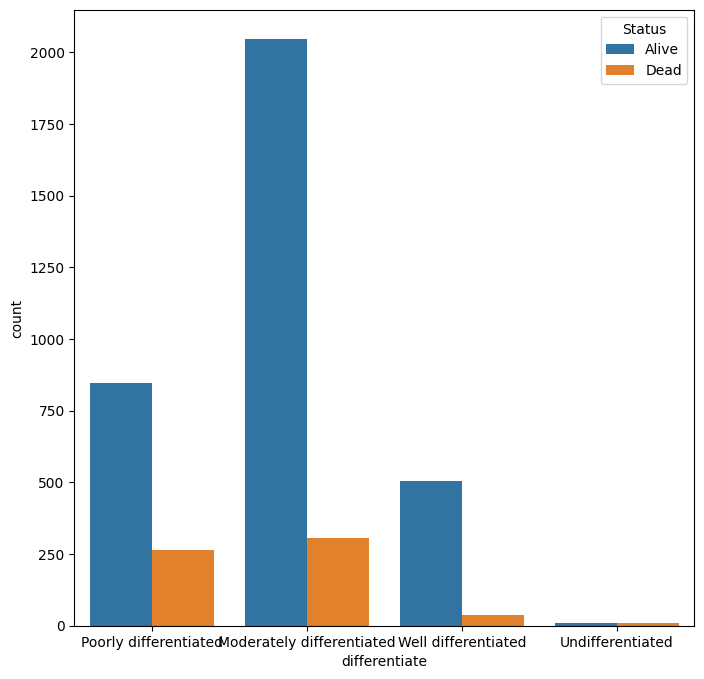

In [29]:
fig = plt.figure(figsize=(8,8))
sns.countplot(data=df, x='differentiate', hue='Status')
plt.show()

<Axes: xlabel='Grade', ylabel='count'>

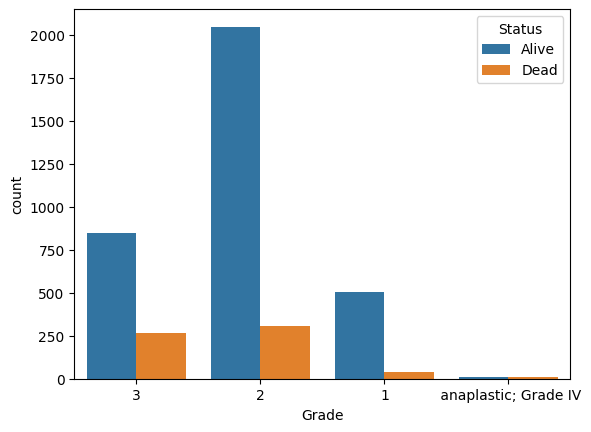

In [30]:
sns.countplot(data=df, x='Grade', hue='Status')

<Axes: xlabel='A Stage', ylabel='count'>

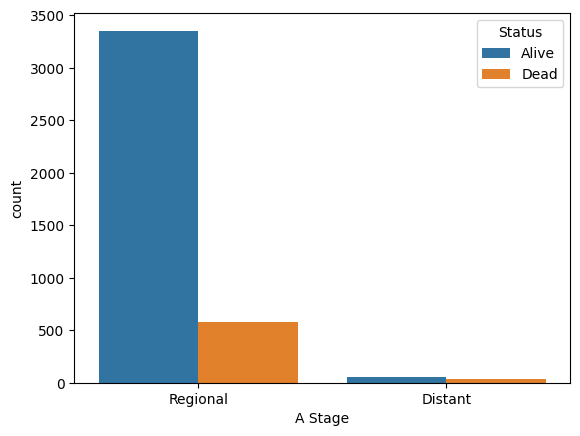

In [31]:
sns.countplot(data=df, x='A Stage', hue='Status')


<Axes: xlabel='Estrogen Status', ylabel='count'>

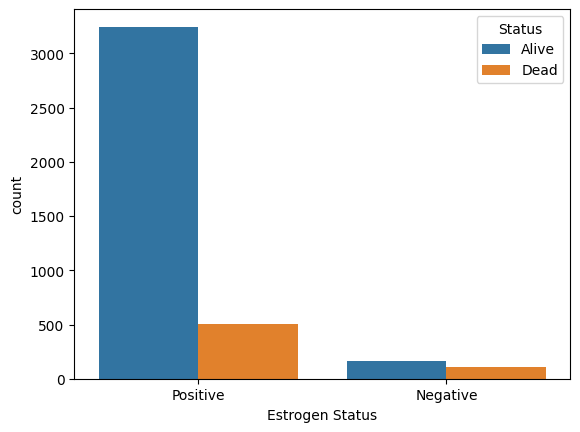

In [32]:
sns.countplot(data=df, x='Estrogen Status', hue='Status')


<Axes: xlabel='Progesterone Status', ylabel='count'>

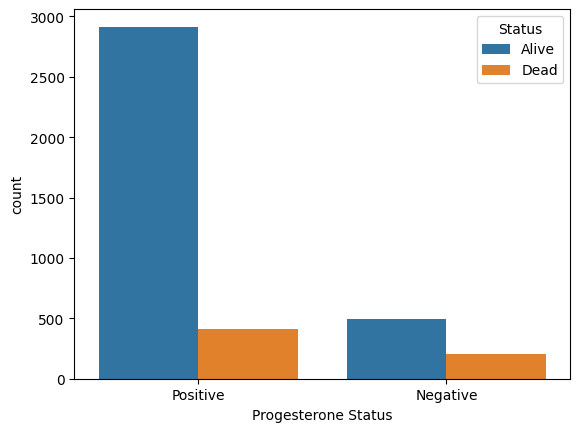

In [33]:
sns.countplot(data=df, x='Progesterone Status', hue='Status')


In [34]:
df.columns


Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Status'],
      dtype='object')

In [35]:
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [36]:
X_num = df[['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive']]
X_cat = df.drop(['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Status'], axis=1)
y = df['Status']

In [37]:
le = LabelEncoder()
y = le.fit_transform(y)
for col in X_cat.columns:
  X_cat[col] = le.fit_transform(X_cat[col])

In [38]:
X = pd.concat([X_num, X_cat], axis=1)

In [39]:
X.head()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status
0,68,4,24,1,2,1,0,0,0,1,3,1,1,1
1,50,35,14,5,2,1,1,1,2,0,2,1,1,1
2,58,63,14,7,2,0,2,2,4,0,2,1,1,1
3,58,18,2,1,2,1,0,0,0,1,3,1,1,1
4,47,41,3,1,2,1,1,0,1,1,3,1,1,1


In [40]:
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)
X_scaled = pd.concat([X_scaled, X_cat], axis=1)
y_scaled = y

In [41]:
X_scaled.head()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status
0,1.565253,-1.253661,1.190676,-0.618172,2,1,0,0,0,1,3,1,1,1
1,-0.443222,0.214345,-0.044095,0.164807,2,1,1,1,2,0,2,1,1,1
2,0.449434,1.540287,-0.044095,0.556296,2,0,2,2,4,0,2,1,1,1
3,0.449434,-0.590691,-1.525820,-0.618172,2,1,0,0,0,1,3,1,1,1
4,-0.777968,0.498475,-1.402343,-0.618172,2,1,1,0,1,1,3,1,1,1


In [43]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, plot_precision_recall_curve

ImportError: cannot import name 'plot_precision_recall_curve' from 'sklearn.metrics' (C:\Users\Aayusi007\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\__init__.py)